# SVM Classification - Utkarsh Gaikwad

In [1]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=1000, n_features=2,n_classes=2, 
                          n_clusters_per_class=2, n_redundant=0,
                          random_state=21)

In [2]:
import pandas as pd
X = pd.DataFrame(X,columns=['x0','x1'])
X.head()

,x0,x1
0,-1.812242,-0.587576
1,1.133389,-1.138860
2,-1.074775,1.350958
3,-1.178771,-0.842958
4,-0.780663,0.747167


In [3]:
Y = pd.DataFrame(Y,columns=['target'])
Y.head()

,target
0,0
1,1
2,0
3,0
4,0


In [4]:
data = pd.concat([X,Y],axis=1)
data.head()

,x0,x1,target
0,-1.812242,-0.587576,0
1,1.133389,-1.138860,1
2,-1.074775,1.350958,0
3,-1.178771,-0.842958,0
4,-0.780663,0.747167,0


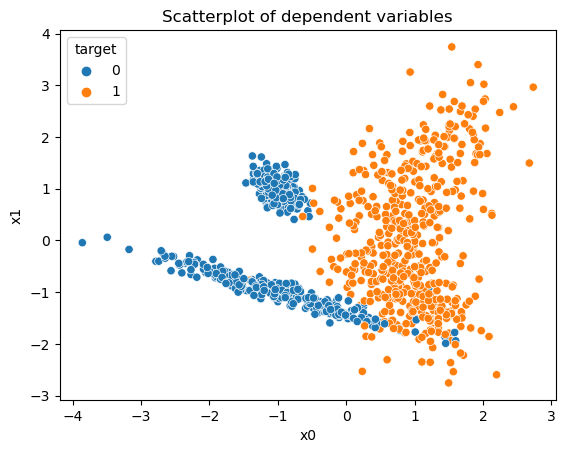

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data, x='x0', y='x1',hue='target')
plt.title('Scatterplot of dependent variables')
plt.show()

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=42)

In [7]:
xtrain.shape

(750, 2)

In [8]:
xtest.shape

(250, 2)

### Model Training

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',probability=True)

In [10]:
svc.fit(xtrain,ytrain.values.flatten())

SVC(kernel='linear', probability=True)

In [11]:
svc.coef_

array([[2.86557772, 0.78311711]])

In [12]:
svc.intercept_

array([0.46362774])

## Predicting test data

In [13]:
ypred_test = svc.predict(xtest)
ypred_test

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0])

## Evaluating the model

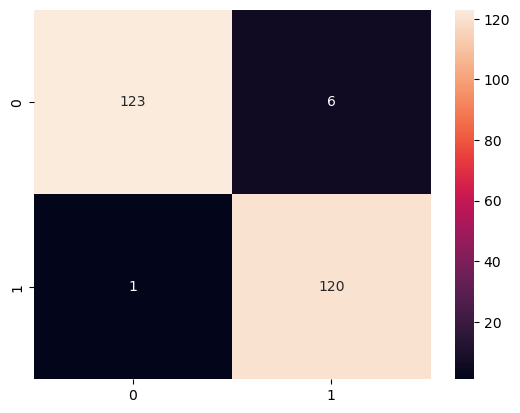

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')
plt.show()

In [15]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.95      0.99      0.97       121

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [16]:
ytest_prob = svc.predict_proba(xtest)

In [17]:
probs = ytest_prob[:,-1]
probs[0:5]

array([8.15769124e-02, 9.96230892e-01, 9.99999619e-01, 9.93171474e-01,
       6.91867981e-06])

In [18]:
roc_auc_score(ytest,probs)

0.9915433403805497

### Hyperparameter Tuning

In [19]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
gscv = GridSearchCV(SVC(),param_grid=parameters,refit=True,cv=5,verbose=3)

In [22]:
gscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
gscv.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [24]:
gscv.best_score_

0.9493333333333334

In [25]:
best_svc =gscv.best_estimator_
best_svc

SVC(C=1000, gamma=1, kernel='linear')

In [26]:
ypred_test = gscv.predict(xtest)
ypred_test

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0])

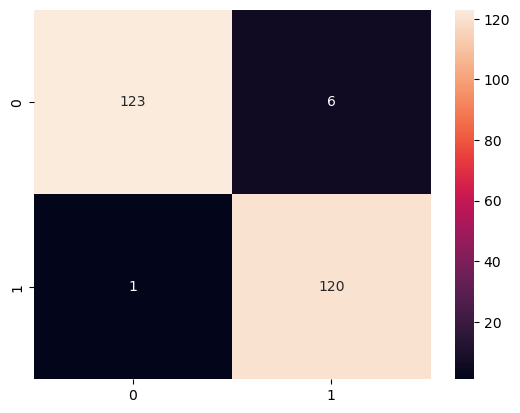

In [27]:
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')
plt.show()

In [28]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.95      0.99      0.97       121

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

